# Cloudbutton Pi number Montecarlo approximation example
In [this notebook](https://github.com/cloudbutton/examples/blob/master/example_pi_montecarlo.ipynb) we will calculate an approximation to the number Pi by applying the Montecarlo algorithm with the Cloudbutton toolkit. Functions will process a fixed amount of random samples each that will then be averaged to provide the approximation.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cloudbutton.multiprocessing import Pool, Queue

%matplotlib notebook

In [2]:
N = 1000
iter_per_func = 100000
chosen_func_mod = N // 20
num_points_to_send = 200

### Monitoring
Some functions will be chosen to send some of their already classified points over a queue that the main process will be consuming from to provide a live image of the first results.

In [3]:
def pi_montecarlo(n, q):  
    l = list()
    value = 0
    chosen = n % chosen_func_mod == 0
    
    for i in range(iter_per_func):
        # Generate random point between 0 and 1
        x = np.random.rand() 
        y = np.random.rand()
        z = np.sqrt(x * x + y * y)
        if z <= 1:
            # Point is inside circle
            value += 1

        if chosen:
            l.append((x, y, z))
            if i == num_points_to_send:
                # Send generated points
                q.put(l)
                chosen = False
            
    est_pi = value * 4.0 / iter_per_func
    return est_pi

### Execution

In [4]:
pool = Pool()
queue = Queue()
results = pool.map_async(func=pi_montecarlo, iterable=[(i, queue) for i in range(N)])

PyWren v1.5.2 init for IBM Cloud Functions - Namespace: pol23btr%40gmail.com_dev - Region: eu_gb
ExecutorID 9984cc/0 | JobID M000 - Selected Runtime: ibmfunctions/action-python-v3.6 - 256MB 
ExecutorID 9984cc/0 | JobID M000 - Uploading function and data - Total: 930.2KiB
ExecutorID 9984cc/0 | JobID M000 - Starting function invocation: pi_montecarlo()  - Total: 1000 activations


### Plot results on the go

<IPython.core.display.Javascript object>


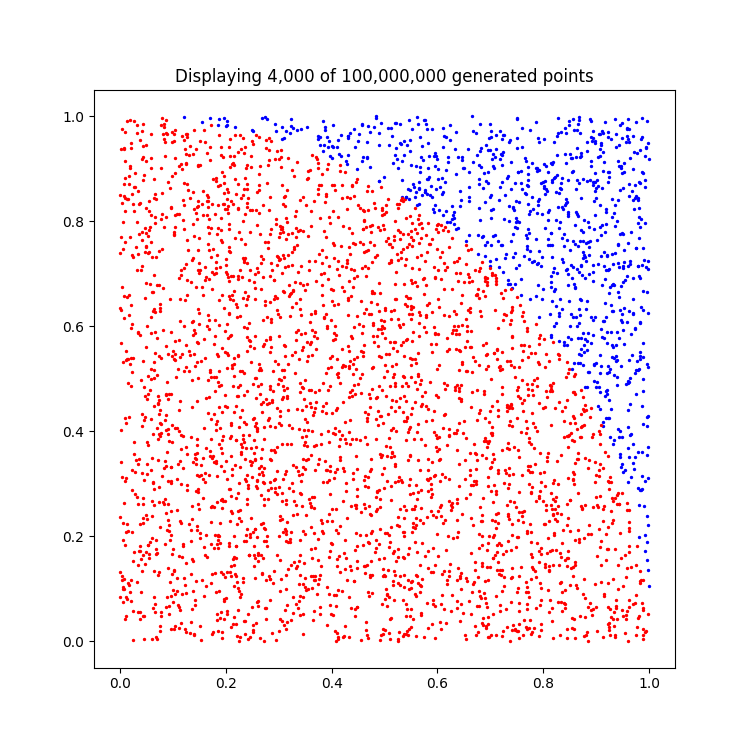

In [5]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
plt.ion()
fig.canvas.draw()
plt.show()

n_messages = 0
num_chosen_func = N // chosen_func_mod

while n_messages < num_chosen_func:
    l = queue.get()  
    for x, y, z in l:
        color = 'red' if z <= 1 else 'blue'
        ax.scatter(x, y, c=color, s=2)
    n_messages += 1
    plt.title("Displaying {:,d} of {:,d} generated points".format(n_messages*num_points_to_send, N*iter_per_func))
    fig.canvas.draw()

plt.close()

## Pi estimation
Finally, we try to calculate the number Pi by averaging the results of each function.  
The more iterations we perform, the more acurate the approximation becomes.

In [6]:
est_pi = np.mean(results.get())
print('Estimated pi: {}'.format(est_pi))
print('Num iterations: {:,d}'.format(N*iter_per_func))

ExecutorID 9984cc/0 - Getting results...



Estimated pi: 3.14152828
Num iterations: 100,000,000
